# In this assignment, you will implement linear regression with one variable.
### 100 points total

In [1]:
# clear all variables
%reset_selective -f a
#import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import random
from sklearn.model_selection import train_test_split

## Load data from data.csv file (5 Points)


In [2]:
# Complete the function below to load the data from data.csv. 
# Return [X,y] where X is the input and y is the target
def load_data(file_name):
    df = pd.read_csv(file_name)
    X = df[df.columns[0]]
#     matrix2 = df[df.columns[0]].to_numpy()
#     X = matrix2.tolist()
    y = df[df.columns[1]]
#     matrix2 = df[df.columns[1]].to_numpy()
#     y = matrix2.tolist()
    return X,y

In [3]:
[X,y] = load_data("data.csv")

### Visualise the data (5 Points)

In [4]:
def vis_data(X,y):
    # X visualizatiion
    print("Visulaizing X: ")
    X.info()
    X.shape
    plt.style.use('bmh')
    X.hist()
    plt.show()
    
     # y visualizatiion
    print("Visulaizing y: ")
    y.info()
    y.shape
    plt.style.use('dark_background')
    y.hist()
    plt.show()
    

Visulaizing X: 
<class 'pandas.core.series.Series'>
RangeIndex: 999 entries, 0 to 998
Series name: 3.745401188473624909e-01
Non-Null Count  Dtype  
--------------  -----  
999 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


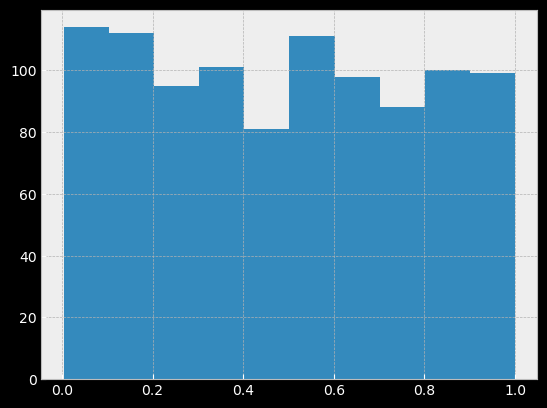

Visulaizing y: 
<class 'pandas.core.series.Series'>
RangeIndex: 999 entries, 0 to 998
Series name: 9.351908797148993813e+00
Non-Null Count  Dtype  
--------------  -----  
999 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


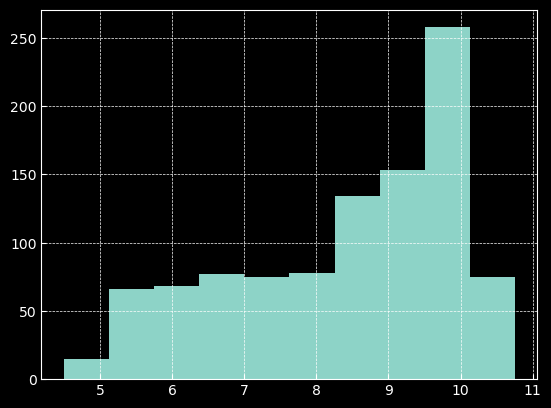

In [31]:
vis_data(X,y)
# x_train, x_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.7)
# print(y_train)
# x_train = x_train[np.isfinite(x_train).all(1)]
# y_train = y_train[np.isfinite(y_train).all(1)]

## Implement a loss function (10 Points)

In [6]:
# y_true --> the target values.
# y_pred --> the predicted values
def loss(y_true, y_pred):    
    #Calculating loss.
    loss = mean_squared_error(y_true, y_pred)
#     squared_error = (y_pred - y_true) ** 2
#     sum_squared_error = np.sum(squared_error)
#     loss = sum_squared_error / y_true.size
    return loss

## Test loss function

In [7]:
loss(np.array([5,2]),np.array([10,3]))

13.0

## Implement a function to calculate gradients (20 Points)

In [8]:
#Input:
# X --> Input.
# y_true --> target values.
# y_pred --> predictions.
#return:
# dw --> the gradient with respect to the weights
# db --> the gradient with respect to the bias.

def gradients(X, y_true, y_pred, weight, bias):
    # write your code here
    learning_rate = 0.01
    n = float(len(X))
    for i in range(50):
        dw = (-2/n) * sum(X * (y - y_pred))  
        db = (-2/n) * sum(y - y_pred)  
        weight = weight - learning_rate * dw  
        bias = bias - learning_rate * db  
    dw = weight
    db = bias
    return dw, db

## Test gradients

In [9]:
dw,db = gradients(np.array([5]),np.array([1.5]),np.array([1.1]), random.random(), random.random())
print(f'dw = {dw} , db = {db}')


dw = 36467.47061031075 , db = 7293.719704860421


## Write a function that uses your loss and gradients to train a LR model (25 Points)

In [33]:
# X --> Input.
# y --> true/target value.
# add more arguments as you need
def linreg(X, weight, bias):
    y_pred = (weight * X) + bias
    return y_pred



def train(X, y,training_epochs,w,b):
    # write your code here
    for epoch in range(training_epochs):
        y_pred = linreg(X, w, b)
        loss_actual = loss(y.to_numpy(), y_pred.to_numpy())
        w, b =  gradients(X,y,y_pred,w,b)
#         print(w,b)
#         print(f"Epoch count {epoch}: Loss value: {loss_actual}")
    return w, b, loss_actual

In [34]:
epoch = 1000
weight = random.random()
bias = random.random()
w, b, loss_actual = train(X, y, epoch, weight, bias)
print(w)
print(b)
print(loss_actual)
# y_pred = linreg(X, w, b)
# plt.scatter(X, y)
# plt.plot(X, y_pred, 'r')

-5.005122181808148
10.855039296222529
0.2353716195483026


## Write a function to use your model to predict (15 Points)

In [12]:
def predict(X, w, b):
    # write your code here
    y_pred = linreg(X,w ,b)
    # Returning predictions.
    return y_pred

### Visualise your predictions

Text(0.5, 1.0, 'Regression')

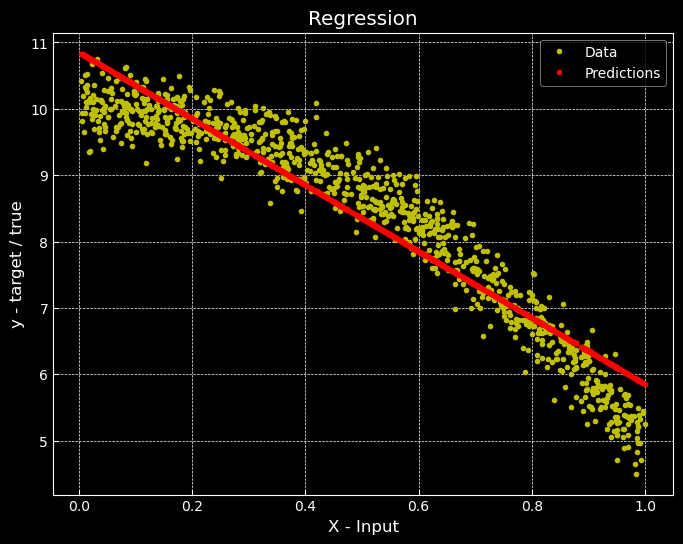

In [13]:
fig = plt.figure(figsize=(8,6))
plt.plot(X, y, 'y.')
plt.plot(X, predict(X, w, b), 'r.')
plt.legend(["Data", "Predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Regression')

## Calculate the fit score

In [14]:
from sklearn.metrics import r2_score

In [15]:
y_true = y
y_pred = predict(X, w, b)
r2_score(y_true, y_pred)

0.9008132687505034

### Use scikit-learn to fit a linear regression model using the data from data,csv (20 points)

The r2 score is 0.9008132687505034


Text(0.5, 1.0, 'Regression')

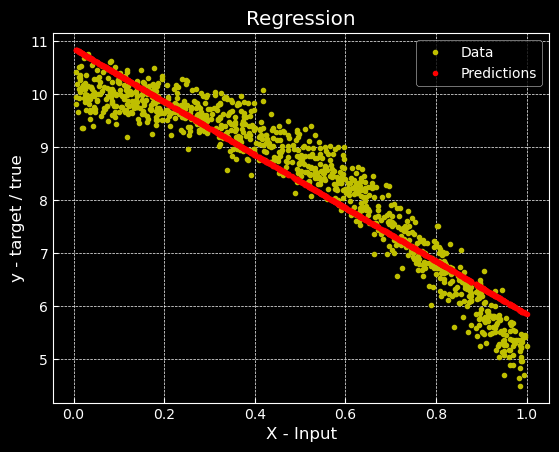

In [16]:
# write your code here
linr_model = LinearRegression().fit(X.to_numpy().reshape(-1, 1), y.to_numpy().reshape(-1, 1))
y_pred = predict(X, w, b)
r2 = r2_score(y, y_pred)
print(f"The r2 score is {r2}")
plt.plot(X, y, 'y.')
plt.plot(X, y_pred, 'r.')
plt.legend(["Data", "Predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Regression')